<a href="https://colab.research.google.com/github/ronnieogwang/Deep_learning_for_CV/blob/master/code/chapter_20/LeNet_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras 

In [0]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD
#from tensorflow.keras. import
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

In [3]:
#load dataset
(X_train, y_train),(X_test,(y_test)) = cifar10.load_data()
#summarize data
print("train X= %s and y=%s" % (X_train.shape, y_train.shape))
print("test X= %s and y=%s" % (X_test.shape, y_test.shape))


train X= (50000, 32, 32, 3) and y=(50000, 1)
test X= (10000, 32, 32, 3) and y=(10000, 1)


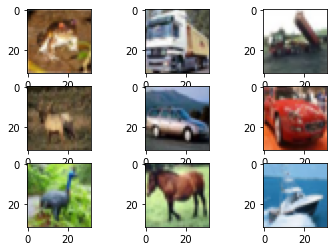

In [4]:
#plot images
for i in range(9):
  pyplot.subplot(331+i)
  pyplot.imshow(X_train[i])
pyplot.show()


In [0]:
#preprocess images
#Normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255.0
X_test = X_test/255.0

#categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [6]:
y_train.shape

(50000, 10)

In [0]:
#create model
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same',kernel_initializer='he_uniform', activation='relu', input_shape =(32,32,3)))
model.add(MaxPooling2D((2,2)))
#model.add(Conv2D(32, (3,3), padding='same',kernel_initializer='he_uniform', activation='relu'))
#model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation= 'relu', kernel_initializer='he_uniform',))
model.add(Dense(10, activation='softmax'))
opt = SGD(lr=0.01, momentum = 0.9)
model.compile(optimizer = opt, loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,050,890
Trainable params: 1,050,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, batch_size=32, epochs =25,validation_data = (X_test, y_test), verbose= 1 )

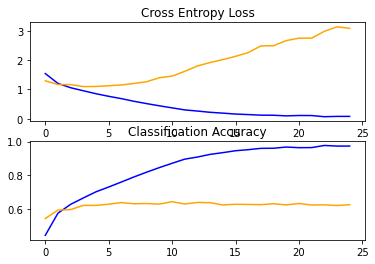

In [10]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

In [0]:
_,acc = model.evaluate(X_test,y_test, verbose = 0)

In [12]:
print('accuracy is: %.3f'%(acc*100.0))

accuracy is: 62.460
